In [64]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from datasets import get_data
attr, test_attr, target = get_data()

### Correlation Between Features

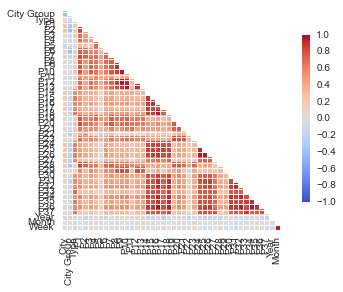

In [5]:
attr0 = attr.copy()
attr0['target'] = target
sns.corrplot(attr, annot=False, diag_names=False)

### Principle Components Analysis

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(attr)
print pca.explained_variance_ratio_

test_pca = pca.transform(test_attr)

[ 0.49584207  0.22271101]


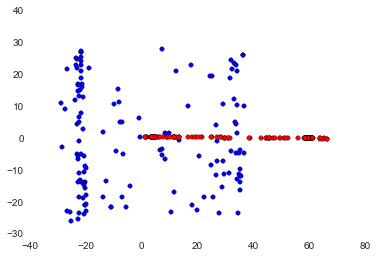

In [75]:
train_pca_0 = pca.inverse_transform(train_pca)
test_pca_0 = pca.inverse_transform(test_pca)

plt.scatter(train_pca[:, 0], train_pca[:, 1], c='b')
plt.scatter(train_pca_0[:, 0], train_pca_0[:, 1], c='r')
#plt.scatter(test_pca[:, 0], test_pca[:, 1], c='k')
#plt.scatter(test_pca_0[:, 0], test_pca_0[:, 1], c='g')

### Linear Regression and Cross Validation

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pca, target)

In [77]:
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
print clf1.coef_, clf1.intercept_

[-31123.63874351  -1063.12289278] 4468392.88763


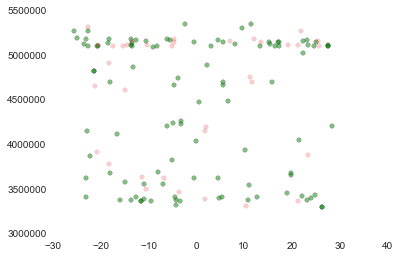

In [78]:
feature_num = 1
plt.scatter(X_train[:, feature_num], predicted_train, c='g', alpha=0.5)
plt.scatter(X_test[:, feature_num], predicted_test, c='r', alpha=0.2)

In [79]:
predictions = clf1.predict(test_pca)

In [80]:
submission = pd.DataFrame({'Prediction': predictions})
submission.to_csv('submission.csv', index_label='Id') 